In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [3]:
import pathlib
dataset_directory = "D:/Desktop/fabrics/"
    
data_dir_train = dataset_directory + "train"
data_dir_valid = dataset_directory + "valid"

data_dir_train = pathlib.Path(data_dir_train) # path usage is same with os.
data_dir_valid = pathlib.Path(data_dir_valid)

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Amount of train data: " , image_count_train)

image_count_valid = len(list(data_dir_valid.glob('*/*.jpg')))
print("Amount of valid data: " , image_count_valid)

Amount of train data:  4335
Amount of valid data:  4340


In [5]:
batch_size = 32
img_height = 300 # original size is 300
img_width = 300

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4335 files belonging to 64 classes.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_valid,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4340 files belonging to 64 classes.


In [8]:
class_names = train_ds.class_names # tag class names to label
print(class_names)

['KTH_aluminium_foil', 'KTH_brown_bread', 'KTH_corduroy', 'KTH_cork', 'KTH_cotton', 'KTH_cracker', 'KTH_linen', 'KTH_orange_peel', 'KTH_sponge', 'KTH_styrofoam', 'KTH_wool', 'Kyberge_blanket1', 'Kyberge_blanket2', 'Kyberge_canvas1', 'Kyberge_ceiling1', 'Kyberge_ceiling2', 'Kyberge_cushion1', 'Kyberge_floor1', 'Kyberge_floor2', 'Kyberge_grass1', 'Kyberge_lentils1', 'Kyberge_linseeds1', 'Kyberge_oatmeal1', 'Kyberge_pearlsugar1', 'Kyberge_rice1', 'Kyberge_rice2', 'Kyberge_rug1', 'Kyberge_sand1', 'Kyberge_scarf1', 'Kyberge_scarf2', 'Kyberge_screen1', 'Kyberge_seat1', 'Kyberge_seat2', 'Kyberge_sesameseeds1', 'Kyberge_stone1', 'Kyberge_stone2', 'Kyberge_stone3', 'Kyberge_stoneslab1', 'Kyberge_wall1', 'UIUC01_bark1', 'UIUC02_bark2', 'UIUC03_bark3', 'UIUC04_wood1', 'UIUC05_wood2', 'UIUC06_wood3', 'UIUC07_water', 'UIUC08_granite', 'UIUC09_marble', 'UIUC10_floor1', 'UIUC11_floor2', 'UIUC12_pebbles', 'UIUC13_wall', 'UIUC14_brick1', 'UIUC15_brick2', 'UIUC16_glass1', 'UIUC17_glass2', 'UIUC18_carpet

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 300, 300, 3)
(32,)


In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE # cpuyu tasarruflu kullanabilmek için optimizasyon algoritması.

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [12]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.05448046 0.960032


In [14]:
num_classes = 64

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)       

In [17]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
136/136 [==============================] - 182s 1s/step - loss: 3.3671 - accuracy: 0.1497 - val_loss: 2.7322 - val_accuracy: 0.2615
Epoch 2/15
136/136 [==============================] - 243s 2s/step - loss: 2.3036 - accuracy: 0.3594 - val_loss: 1.9090 - val_accuracy: 0.4765
Epoch 3/15
136/136 [==============================] - 82s 603ms/step - loss: 1.4249 - accuracy: 0.5827 - val_loss: 1.4112 - val_accuracy: 0.5484
Epoch 4/15
136/136 [==============================] - 59s 434ms/step - loss: 0.7246 - accuracy: 0.7896 - val_loss: 1.1503 - val_accuracy: 0.6399
Epoch 5/15
136/136 [==============================] - 74s 547ms/step - loss: 0.4863 - accuracy: 0.8614 - val_loss: 0.9809 - val_accuracy: 0.6988
Epoch 6/15
136/136 [==============================] - 70s 488ms/step - loss: 0.3100 - accuracy: 0.9089 - val_loss: 1.0825 - val_accuracy: 0.7021
Epoch 7/15
136/136 [==============================] - 35s 259ms/step - loss: 0.1504 - accuracy: 0.9548 - val_loss: 1.0834 - val_accura

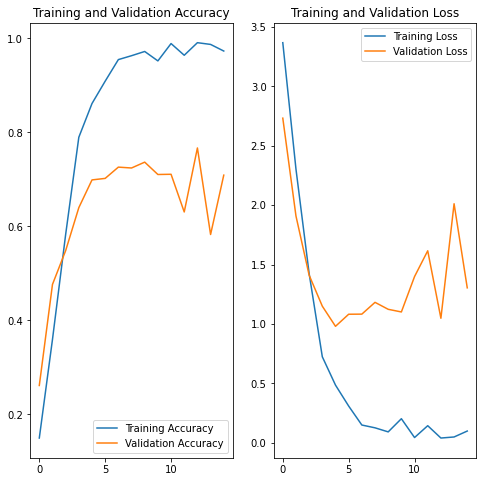

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
model_json = model.to_json()
with open("D:/Desktop/AgteksDemo_AI/agteksdemo.json", "w") as json_file:
    json_file.write(model_json)

In [20]:
model.save("D:/Desktop/AgteksDemo_AI/agteksdemo.h5")

In [21]:
from keras.preprocessing.image import ImageDataGenerator

data_dir_train = ImageDataGenerator()
data_dir_valid = ImageDataGenerator()

train_ds = data_dir_train.flow_from_directory(dataset_directory + "train",
                                                    target_size=(img_height,img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_ds = data_dir_valid.flow_from_directory(dataset_directory + "valid",
                                                    target_size=(img_height,img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 4335 images belonging to 64 classes.
Found 4340 images belonging to 64 classes.


<Figure size 432x288 with 0 Axes>

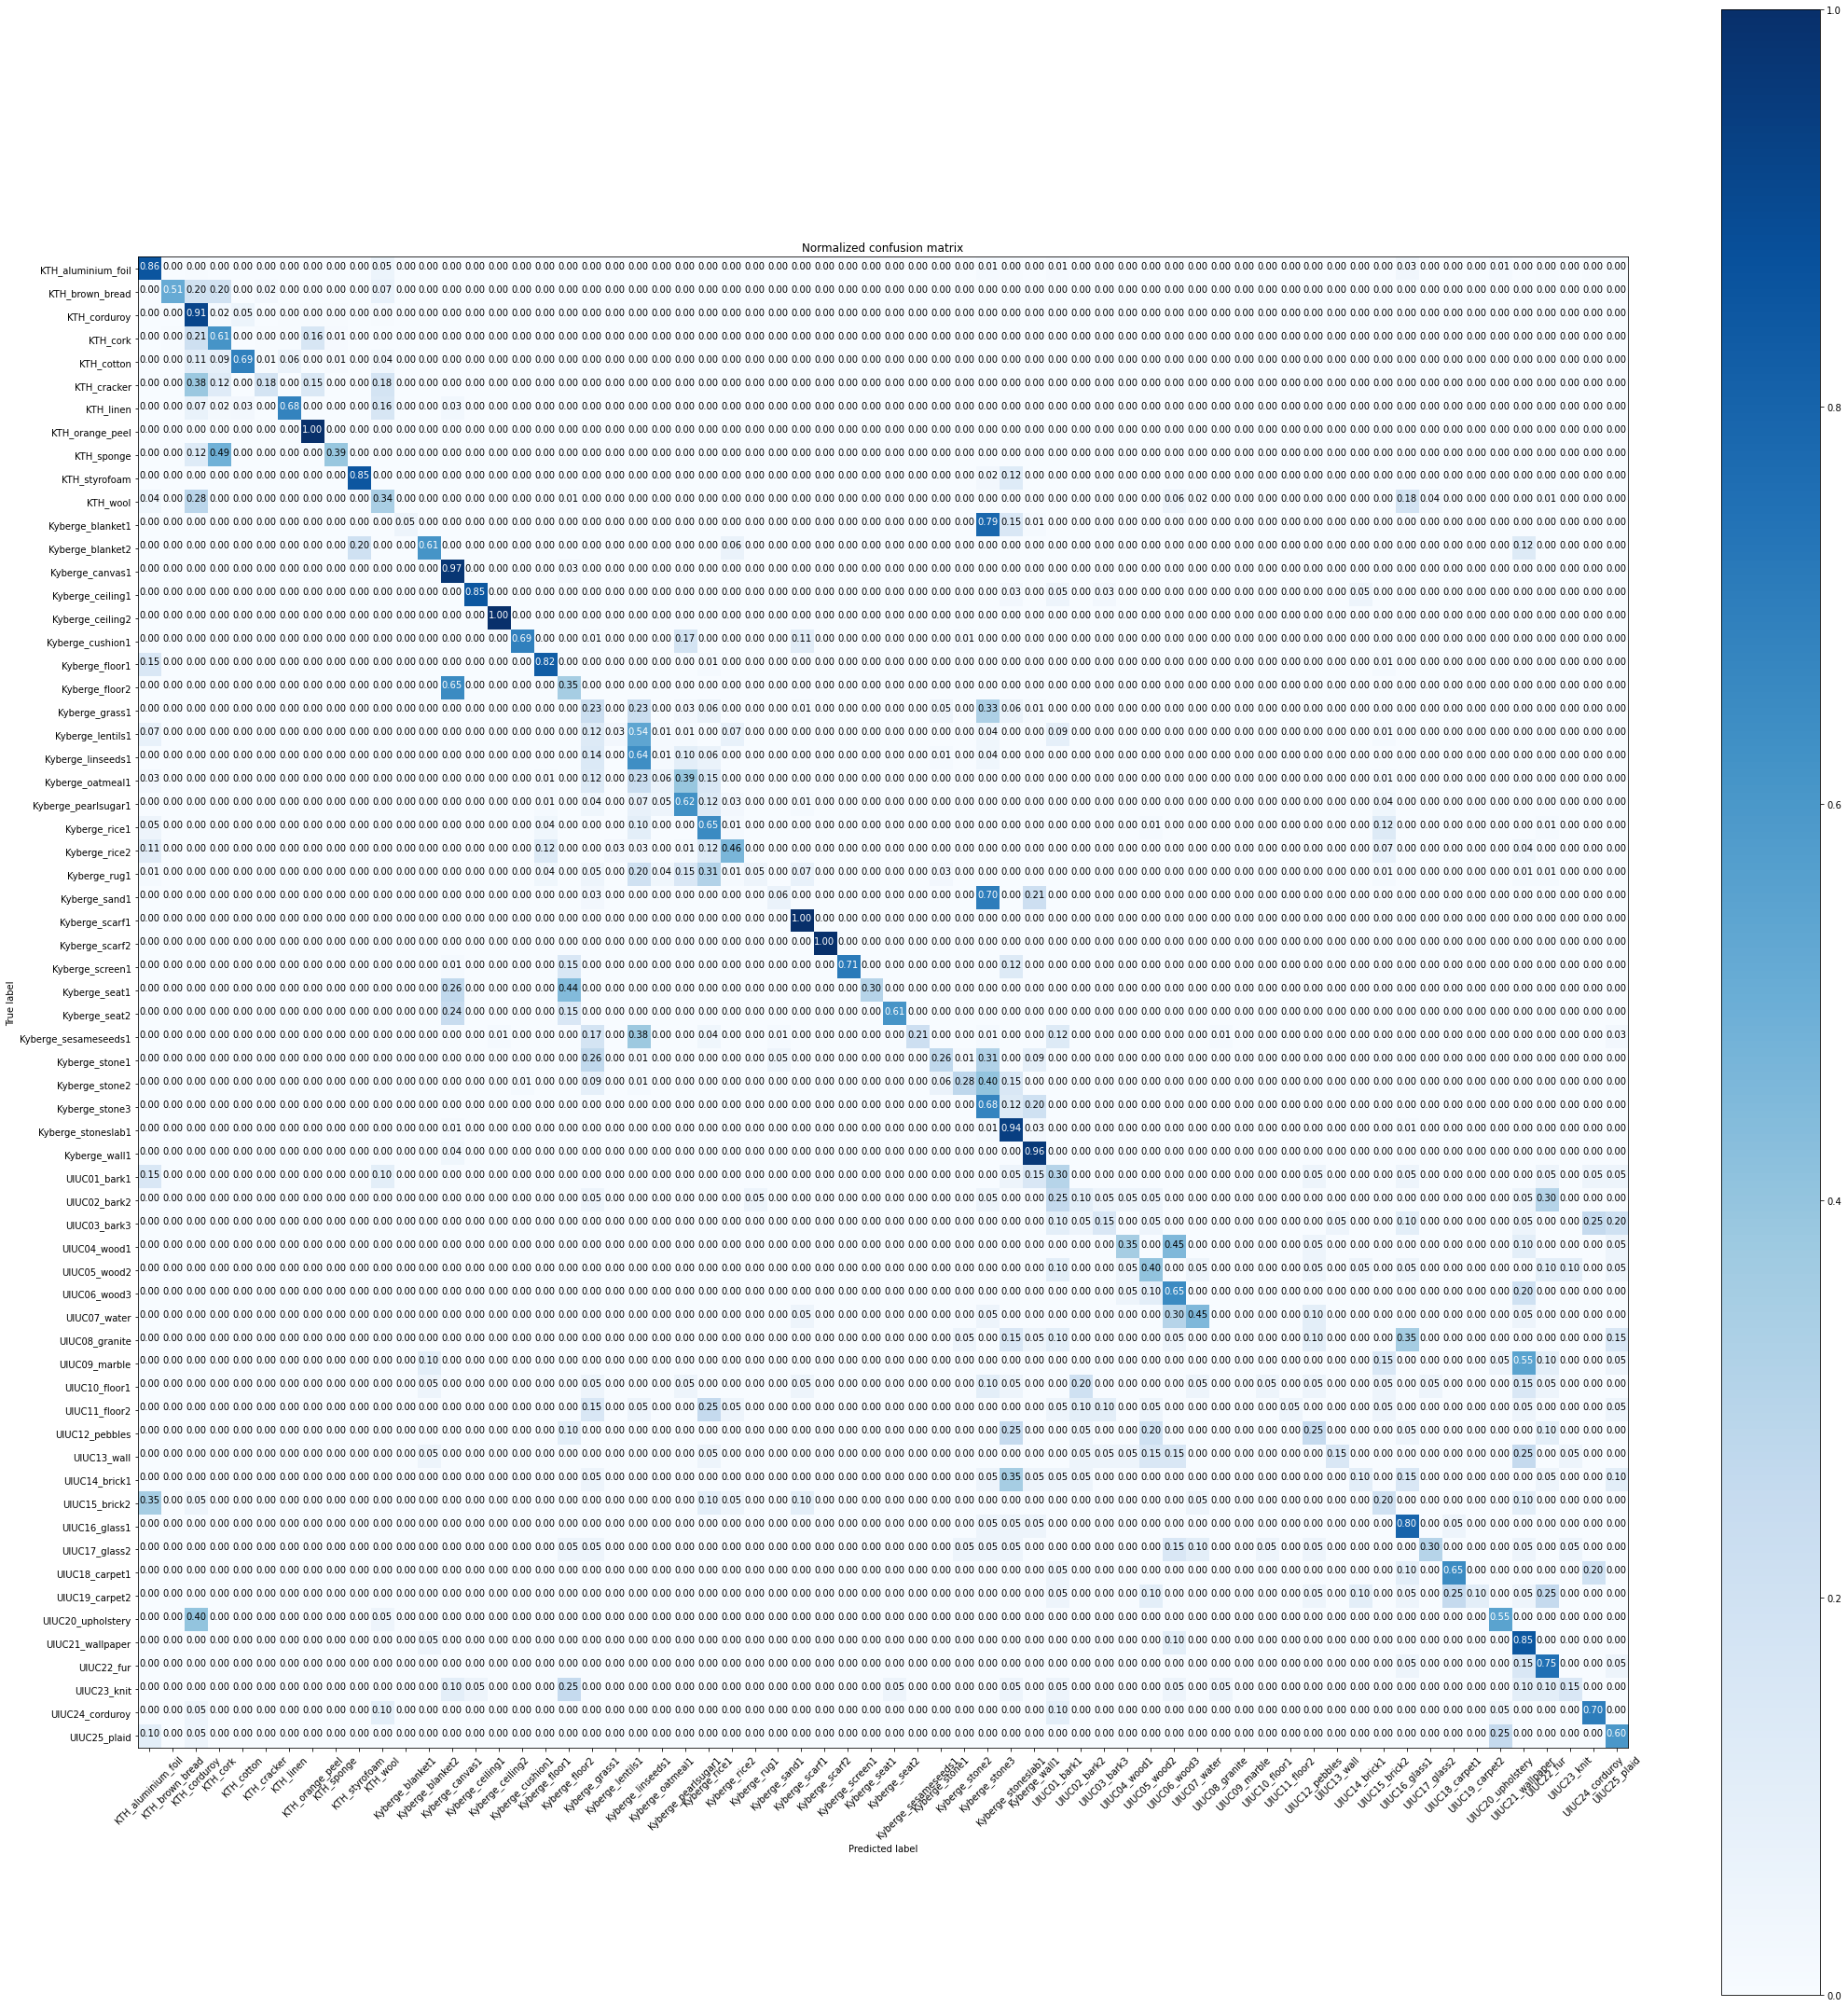

In [21]:
predictions = model.predict(val_ds)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = val_ds.classes
class_names = val_ds.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(30,30))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [54]:
from keras.models import model_from_json

class PredictionModel(object):
    
    class_names = train_ds.classes

    FABRIC_CLASS_LIST = class_names

    def __init__(self, model_json_file, model_weights_file):
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)

        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model._make_predict_function()

    def predict_class(self, img):
        self.preds = self.loaded_model.predict(img)
        return PredictionModel.FABRIC_CLASS_LIST[np.argmax(self.preds)]